In [ ]:
# Exploratory data analysis 

In [1]:
import pandas as pd
import json

with open('data_full.json') as json_file: 
    data_dict = json.load(json_file) 

print(data_dict.keys())

dict_keys(['oos_val', 'val', 'train', 'oos_test', 'test', 'oos_train'])


In [2]:


train_data = data_dict['train']
val_data = data_dict['val']
test_data = data_dict['test']

oos_train = data_dict['oos_train']
oos_val = data_dict['oos_val']
oos_test = data_dict['oos_test']


train_df = pd.DataFrame(train_data, columns =['query', 'intent'])
val_df = pd.DataFrame(val_data, columns =['query', 'intent'])
test_df = pd.DataFrame(test_data, columns =['query', 'intent'])

#print(train_df.head())
# grouping
#train_df.groupby("intent").count().to_excel('ds_grouped.xlsx',sheet_name="Sheet1")

Number of types: 169
Most common type: [('fact', 52), ('tell', 43), ('fun', 39), ('trivia', 36), ('interesting', 21), ('something', 18), ('know', 15), ('facts', 13), ('give', 12), ("'s", 11)]


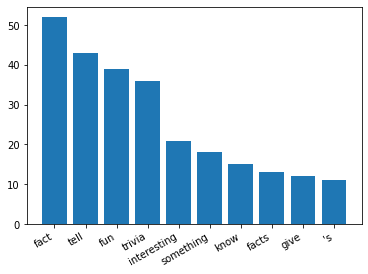

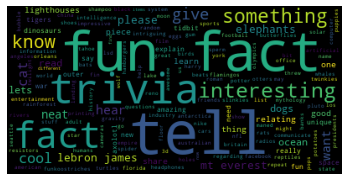

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords

# concatenating validation and train set
frames = [train_df,val_df]
train_val_df = pd.concat(frames)

intent_class=["fun_fact","replacement_card_duration","time","maybe","car_rental"]

fun_fact = train_val_df[train_val_df['intent']==intent_class[0]]
fun_fact_list = fun_fact['query'].tolist()


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(fun_fact_list).toarray()



tokens_list = []
wordcloud = WordCloud().generate(" ".join(fun_fact_list))
tokens = word_tokenize(" ".join(fun_fact_list))
tokens_list=[w for w in tokens if w not in list(stopwords.words('english'))]
c = Counter(tokens_list)
most_common = c.most_common(10)

print("Number of types:",len(set(tokens_list)))
print("Most common type:",most_common)

feats = [feat[0] for feat in most_common]
counts = [count[1] for count in most_common]

plt.bar(feats,counts)
plt.xticks(rotation=30, ha='right')


plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from operator import itemgetter

def plot_top_n(corpus, intent, vectorizer, n):
    idx = keys.index(intent)
    X = vectorizer.fit_transform(corpus).toarray()
    feat_val = list(zip(vectorizer.get_feature_names_out(), X[idx]))
    feat_val.sort(key=itemgetter(1), reverse=True)
    

    feat_val_top_n = feat_val[:n-1]
    feat_val_sep = list(zip(*feat_val_top_n))
    
    # plot's labels
    plt.title(intent)
    plt.xlabel("More relavant words")
    plt.ylabel("number of apperances")

    # format the x values 
    plt.bar(feat_val_sep[0],feat_val_sep[1])
    plt.xticks(rotation=30, ha='right')
    plt.show()

For the intent class 'calculator' the top 10 unigrams have the following counts and TF-IDF scores:


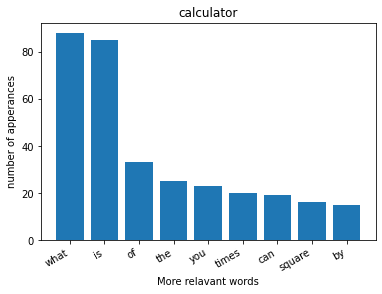

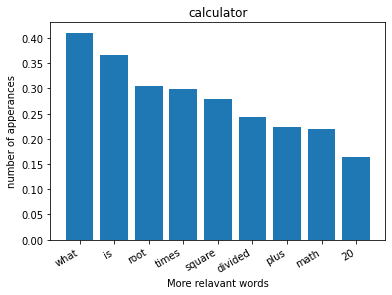

For the intent class 'calculator' the top 10 2-grams have the following counts and TF-IDF scores:


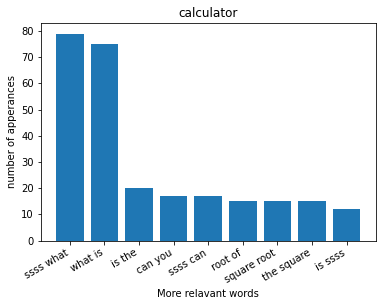

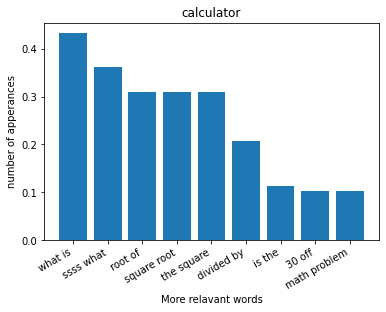

In [5]:
intents = train_val_df.groupby('intent')['query'].apply(lambda x: " ".join(x))
keys = list(intents.keys())
values = list(intents.values)

intent = "calculator"

n = 10
print(f"For the intent class '{intent}' the top {n} unigrams have the following counts and TF-IDF scores:")
plot_top_n(values, intent, CountVectorizer(ngram_range=(1,1)), n)
plot_top_n(values, intent, TfidfVectorizer(ngram_range=(1,1)), n)


intents = train_val_df.groupby('intent')['query'].apply(lambda x: "ssss " + " ssss ".join(x) + " ssss")
keys = list(intents.keys())
values = list(intents.values)

n_gram = 2
n = 10
print(f"For the intent class '{intent}' the top {n} {n_gram}-grams have the following counts and TF-IDF scores:")
plot_top_n(values, intent, CountVectorizer(ngram_range=(n_gram,n_gram)), n)
plot_top_n(values, intent, TfidfVectorizer(ngram_range=(n_gram,n_gram)), n)


### Pre-Processing 
Since we are using the preprocessor step in conjuction with the TfidfVectorizer we need to define the fuction that we want to use for the preprocessing.
since the TfidfVectorizer already lower case and tokenize the corpus the normalazing missing steps, lemmatize and acent removing [to do how to write this????] are added to the preprocessing  

##### Our Preprocessing function 

In [6]:
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
def preProcess(w):
    lemmatizer = WordNetLemmatizer()
    return unidecode(lemmatizer.lemmatize(w))
#print(preProcess("Ü"))

##### List of stop words

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download(['stopwords'])
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Grouping by domains:

Load the domains from the jason 

In [7]:
with open('domains.json') as json_file:
    domain_dict = json.load(json_file)
inv_domain_dict = {}
for domainKey in domain_dict.keys():
    for intent in domain_dict[domainKey]:
        inv_domain_dict[intent] = domainKey

#### Group intents by domain 
Each domain have 10 intent classes, what we are doing here is group all the intents of a domain into a single "class".

In [8]:
#unigram
intent_domains_unigram = train_val_df.set_index('intent').groupby(inv_domain_dict, group_keys=True)['query'].apply(lambda x: " ".join(x))
keys_unigram = list(intent_domains_unigram.keys())
values_unigram = list(intent_domains_unigram.values)

# n-gram
intent_domains_n_gram = train_val_df.set_index('intent').groupby(inv_domain_dict, group_keys=True)['query'].apply(lambda x: "ssss " + " ssss ".join(x) + " ssss")
keys_n_gram = list(intent_domains_n_gram.keys())
values_n_gram = list(intent_domains_n_gram.values)


#### Plot more relevant words

###################################################################################################
                                          BANKING
###################################################################################################
                                      ###UNIGRAM###
For the domain 'banking' the top 10 unigrams have the following counts and TF-IDF scores:


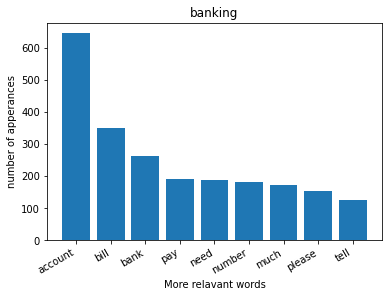

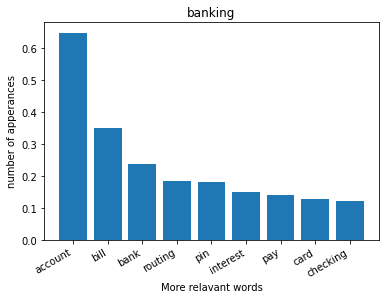

                                     ###'10'-GRAM###
For the domain 'banking' the top 10 2-grams have the following counts and TF-IDF scores:


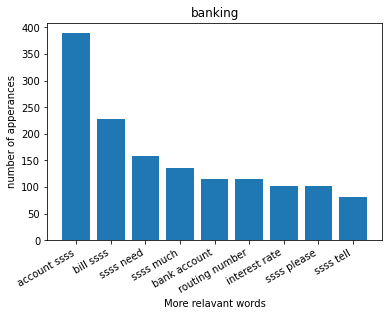

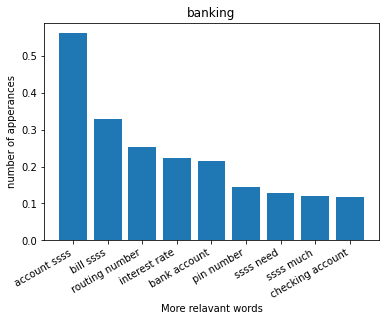

###################################################################################################
                                          CREDIT_CARDS
###################################################################################################
                                      ###UNIGRAM###
For the domain 'credit_cards' the top 10 unigrams have the following counts and TF-IDF scores:


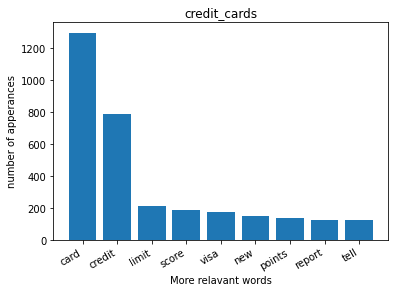

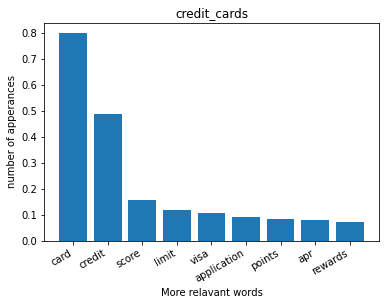

                                     ###'10'-GRAM###
For the domain 'credit_cards' the top 10 2-grams have the following counts and TF-IDF scores:


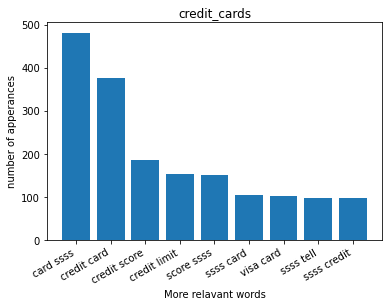

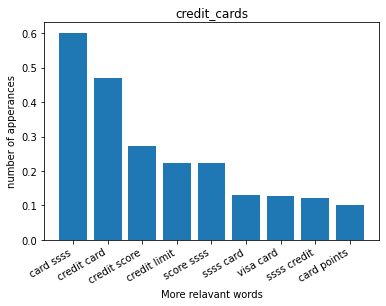

###################################################################################################
                                          KITCHEN_AND_DINING
###################################################################################################
                                      ###UNIGRAM###
For the domain 'kitchen_and_dining' the top 10 unigrams have the following counts and TF-IDF scores:


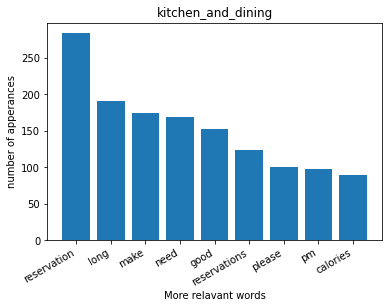

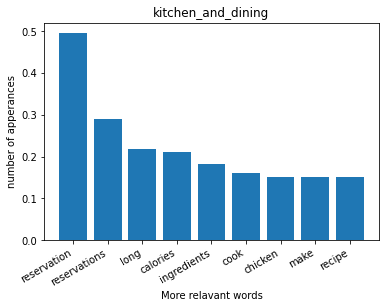

                                     ###'10'-GRAM###
For the domain 'kitchen_and_dining' the top 10 2-grams have the following counts and TF-IDF scores:


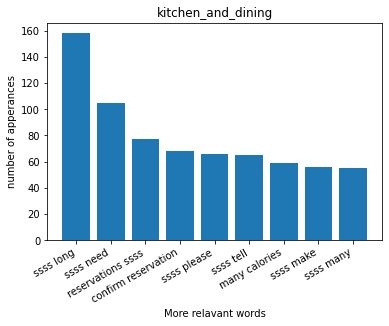

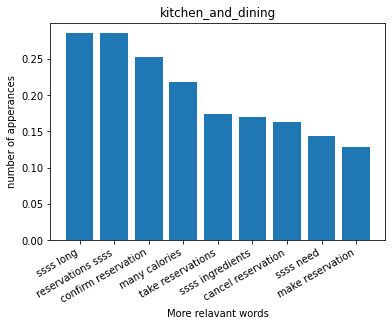

###################################################################################################
                                          HOME
###################################################################################################
                                      ###UNIGRAM###
For the domain 'home' the top 10 unigrams have the following counts and TF-IDF scores:


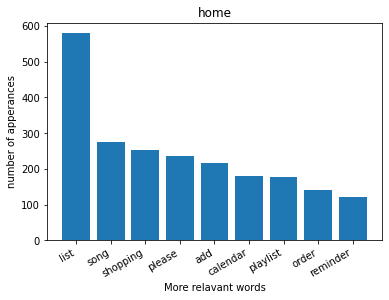

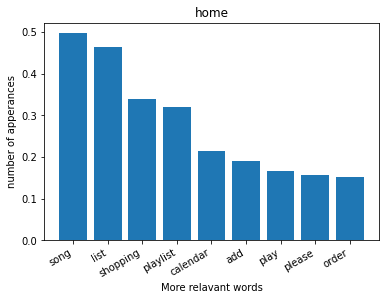

                                     ###'10'-GRAM###
For the domain 'home' the top 10 2-grams have the following counts and TF-IDF scores:


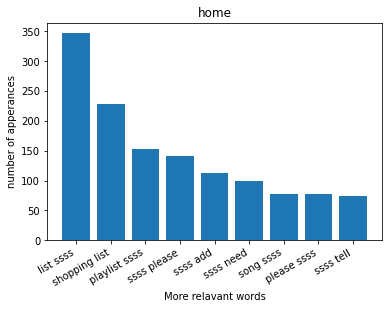

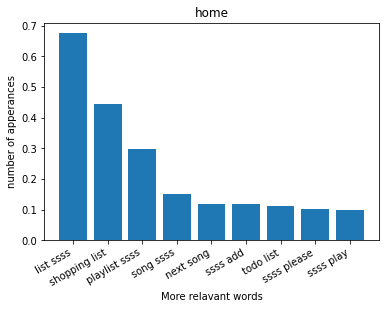

###################################################################################################
                                          AUTO_AND_COMMUTE
###################################################################################################
                                      ###UNIGRAM###
For the domain 'auto_and_commute' the top 10 unigrams have the following counts and TF-IDF scores:


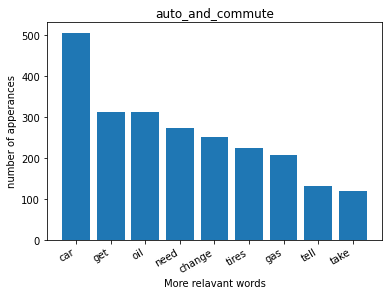

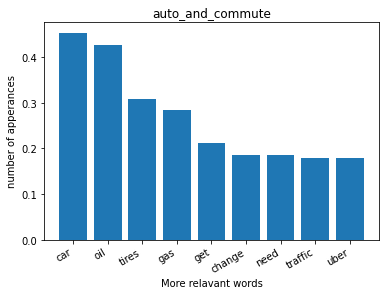

                                     ###'10'-GRAM###
For the domain 'auto_and_commute' the top 10 2-grams have the following counts and TF-IDF scores:


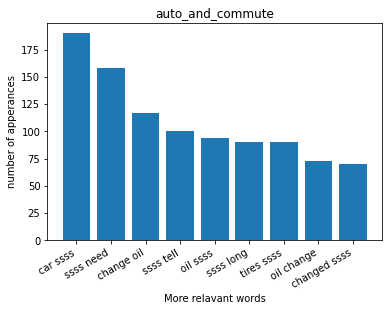

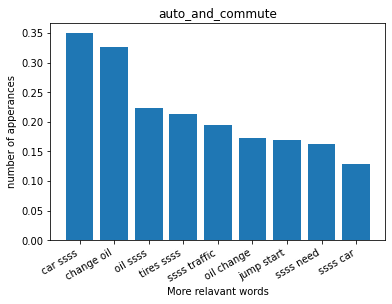

###################################################################################################
                                          TRAVEL
###################################################################################################
                                      ###UNIGRAM###
For the domain 'travel' the top 10 unigrams have the following counts and TF-IDF scores:


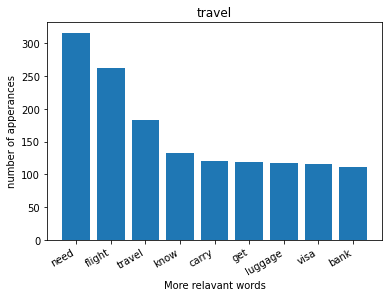

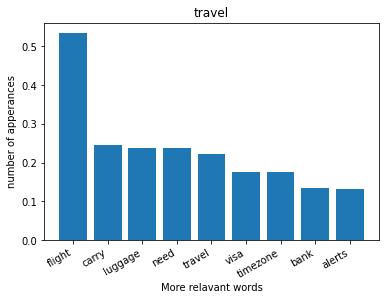

                                     ###'10'-GRAM###
For the domain 'travel' the top 10 2-grams have the following counts and TF-IDF scores:


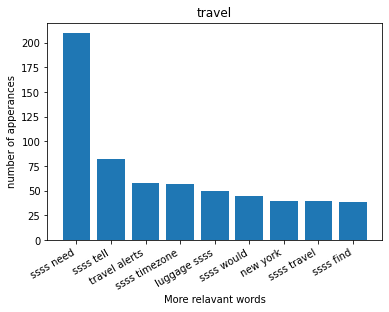

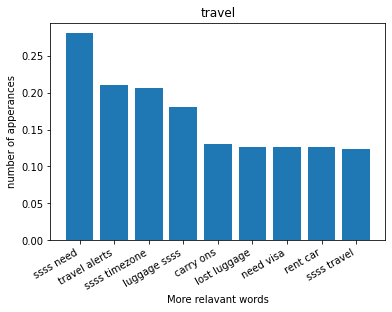

###################################################################################################
                                          UTILITY
###################################################################################################
                                      ###UNIGRAM###
For the domain 'utility' the top 10 unigrams have the following counts and TF-IDF scores:


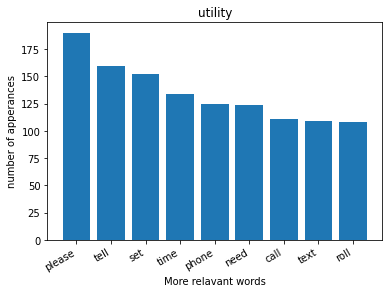

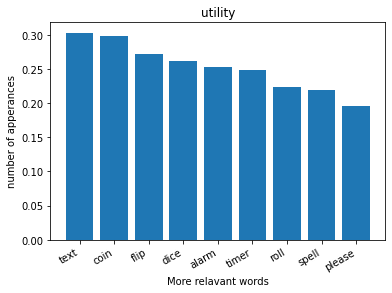

                                     ###'10'-GRAM###
For the domain 'utility' the top 10 2-grams have the following counts and TF-IDF scores:


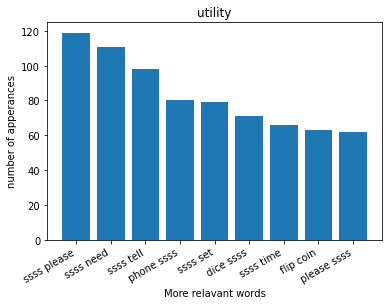

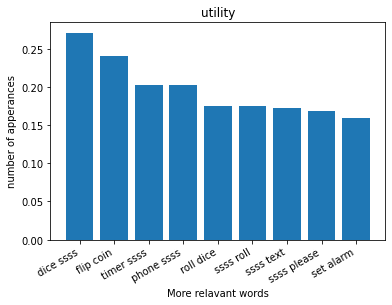

###################################################################################################
                                          WORK
###################################################################################################
                                      ###UNIGRAM###
For the domain 'work' the top 10 unigrams have the following counts and TF-IDF scores:


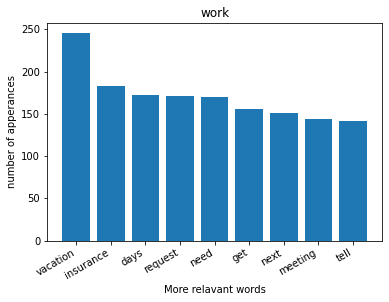

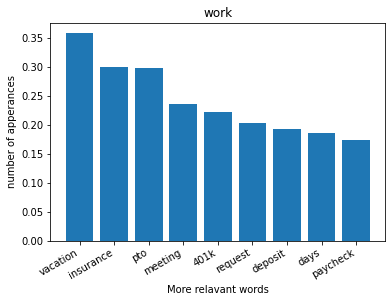

                                     ###'10'-GRAM###
For the domain 'work' the top 10 2-grams have the following counts and TF-IDF scores:


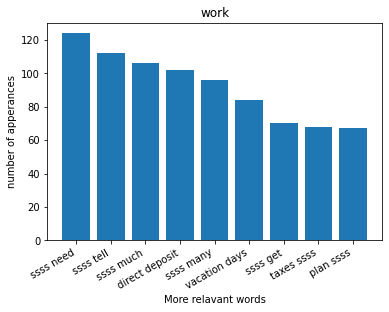

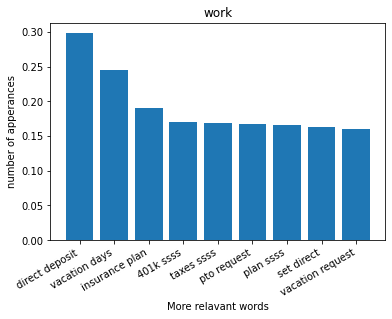

###################################################################################################
                                          SMALL_TALK
###################################################################################################
                                      ###UNIGRAM###
For the domain 'small_talk' the top 10 unigrams have the following counts and TF-IDF scores:


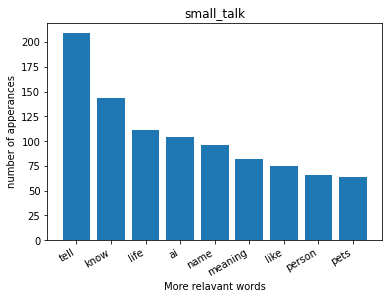

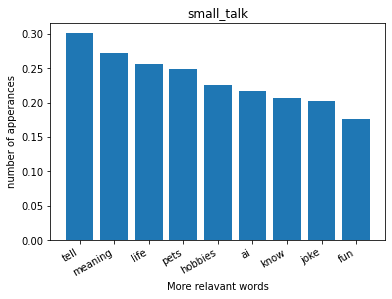

                                     ###'10'-GRAM###
For the domain 'small_talk' the top 10 2-grams have the following counts and TF-IDF scores:


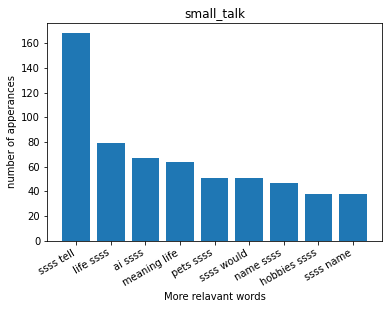

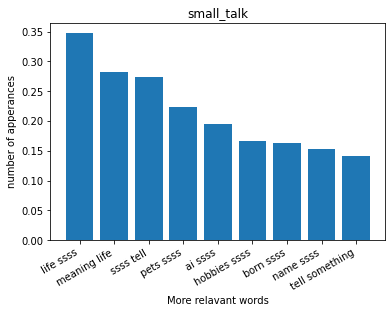

###################################################################################################
                                          META
###################################################################################################
                                      ###UNIGRAM###
For the domain 'meta' the top 10 unigrams have the following counts and TF-IDF scores:


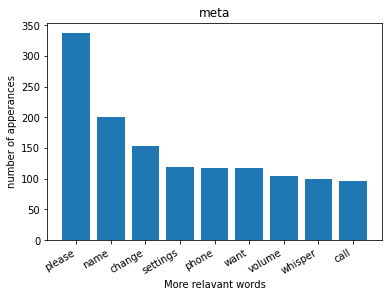

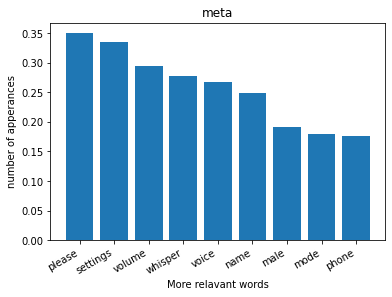

                                     ###'10'-GRAM###
For the domain 'meta' the top 10 2-grams have the following counts and TF-IDF scores:


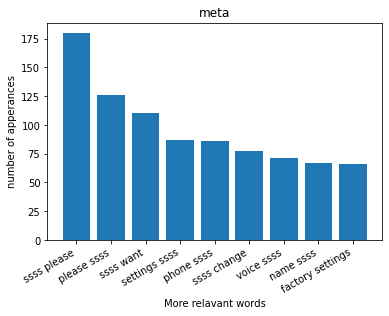

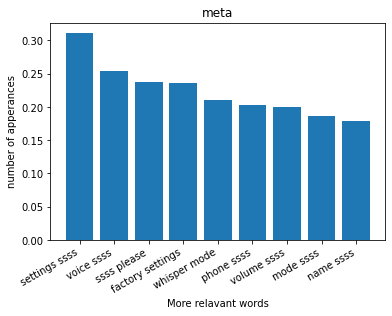

In [16]:


for domain in domain_dict.keys():
    
    n = 10 # number of n more relevant words 
    n_gram = 2 # number of n-grams
    print("###################################################################################################")
    print(f"                                          {domain.upper()}")
    print("###################################################################################################")
    print("                                      ###UNIGRAM###")
    print(f"For the domain '{domain}' the top {n} unigrams have the following counts and TF-IDF scores:")
    plot_top_n(values_unigram, domain, CountVectorizer(ngram_range=(1,1), preprocessor=preProcess, stop_words=stop_words), n)
    plot_top_n(values_unigram, domain, TfidfVectorizer(ngram_range=(1,1), preprocessor=preProcess, stop_words=stop_words, use_idf=True), n)

   
    print(f"                                     ###'{n_gram}'-GRAM###")
    print(f"For the domain '{domain}' the top {n} {n_gram}-grams have the following counts and TF-IDF scores:")
    plot_top_n(values_n_gram, domain, CountVectorizer(ngram_range=(n_gram,n_gram),preprocessor=preProcess, stop_words=stop_words), n)
    plot_top_n(values_n_gram, domain, TfidfVectorizer(ngram_range=(n_gram,n_gram), preprocessor=preProcess, stop_words=stop_words, use_idf=True), n)